word2vec -> co occurance matrix

In [3]:
import gzip
import logging

In [12]:
import gensim

In [14]:
def read_input(input_file):
    logging.info("reading file {0}... this will take a while".format(input_file))
    with gzip.open(input_file, 'rb') as f:
        for i, line in enumerate(f):
            if(i % 10000 == 0):
                logging.info("read {0} review".format(i))
            yield gensim.utils.simple_preprocess(line)

documents = list(read_input("reviews_data.txt.gz"))
logging.info("Done reading data file")

In [17]:
model = gensim.models.Word2Vec(documents, size=150, window=10, min_count=2, workers=10)
model.train(documents, total_examples=len(documents), epochs=10)

(303487457, 415193550)

In [18]:
w1 = "dirty"
model.wv.most_similar (positive = w1)
model.wv.most_similar (positive = w1, topn = 6)


C:\Users\anirudh\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('filthy', 0.8674746155738831),
 ('stained', 0.7710552215576172),
 ('dusty', 0.7690283060073853),
 ('unclean', 0.7650132179260254),
 ('grubby', 0.759979248046875),
 ('smelly', 0.7510631084442139)]

In [19]:
w1 = ["polite"]
model.wv.most_similar (positive = w1, topn = 6)


C:\Users\anirudh\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('courteous', 0.9189949631690979),
 ('friendly', 0.8289467692375183),
 ('professional', 0.8066202402114868),
 ('cordial', 0.7986091375350952),
 ('attentive', 0.7758539319038391),
 ('curteous', 0.7719935178756714)]

(-0.5, 399.5, 199.5, -0.5)

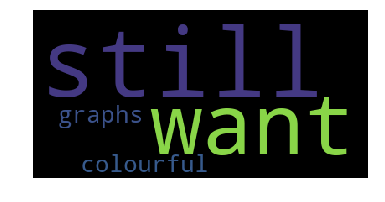

In [22]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

text = "They still want colourful graphs"
wordcloud = WordCloud(relative_scaling = 1.0, stopwords = set(STOPWORDS)).generate(text)
plt.imshow(wordcloud)
plt.axis("off")
